In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [3]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ebcc9d128>,
      dtype=object)

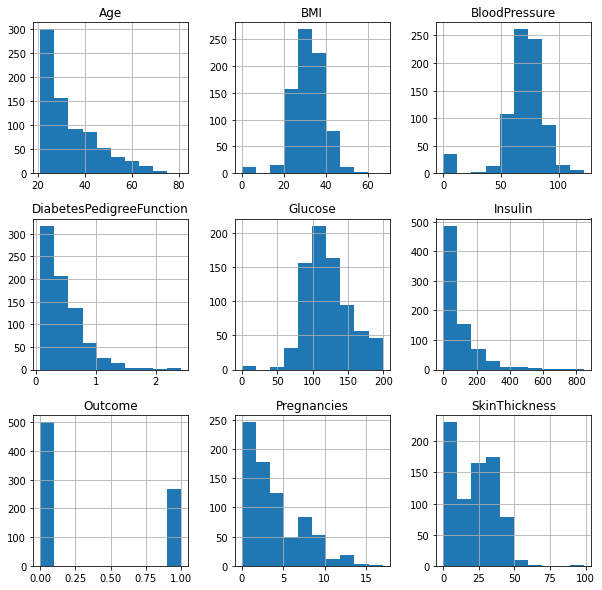

In [6]:
df.hist(figsize=(10,10))

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
x = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(537, 8) (115, 8) (116, 8) (537,) (115,) (116,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(32,activation='relu',input_shape=(8,)),Dense(32, activation='relu'),Dense(1, activation='sigmoid'),])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
17/17 [==============================] - 0s 11ms/step - loss: 0.6633 - accuracy: 0.6462 - val_loss: 0.6624 - val_accuracy: 0.6609
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.7393 - val_loss: 0.6253 - val_accuracy: 0.6696
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7561 - val_loss: 0.5925 - val_accuracy: 0.6435
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7803 - val_loss: 0.5702 - val_accuracy: 0.6609
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7896 - val_loss: 0.5524 - val_accuracy: 0.6783
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7933 - val_loss: 0.5355 - val_accuracy: 0.7043
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7877 - val_loss: 0.5314 - val_accuracy: 0.7217
Epoch 8/100


In [14]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7500


[0.5721232891082764, 0.75]

In [20]:
model2 = Sequential([Dense(32,activation='relu',input_shape=(8,)),Dense(40, activation='relu'),Dense(1, activation='sigmoid'),])
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
hist2 = model.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.9590 - val_loss: 0.9411 - val_accuracy: 0.6870
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9590 - val_loss: 0.9589 - val_accuracy: 0.6870
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9609 - val_loss: 0.9472 - val_accuracy: 0.6870
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9572 - val_loss: 0.9577 - val_accuracy: 0.6957
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9553 - val_loss: 0.9620 - val_accuracy: 0.6870
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9628 - val_loss: 0.9604 - val_accuracy: 0.6783
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9628 - val_loss: 0.9878 - val_accuracy: 0.6957
Epoch 8/100
1

In [16]:
model2.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.3966


[0.7236900925636292, 0.3965517282485962]

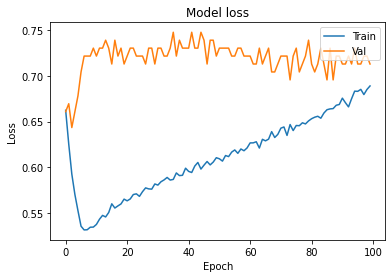

In [18]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title('ADAM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

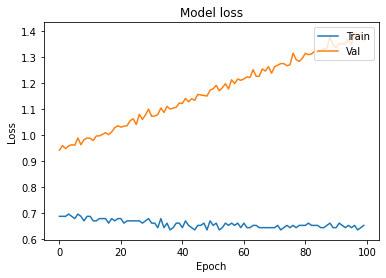

In [21]:
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist2.history['val_loss'])
plt.title('SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

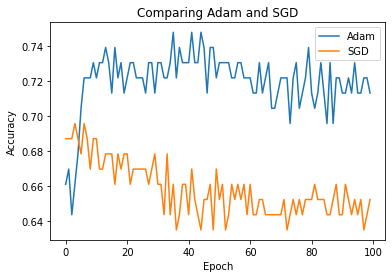

In [25]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Comparing Adam and SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam', 'SGD'], loc='upper right')
plt.show()

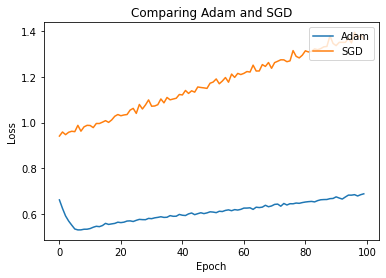

In [26]:
plt.plot(hist.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Comparing Adam and SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Adam', 'SGD'], loc='upper right')
plt.show()